<span style="color:blue">**TITANIC DATA BINARY CLASSIFICATION** </span>

<ins> <span style="color:green">**Step1: -**</span> </ins> 

<ins> _**Case Study**_ </ins> 

What are the factors that impact the survival of the passengers from titanic disaster.   

* <ins> _**Goal**_ </ins> : -  
    * Predict which passengers survived the tragedy(Disaster)  


* <ins> _**Objective**_ </ins> : -
    * To Review the process to idetify the survivals 
    




<ins> **<span style="color:green">Step2: -</span>** </ins>

* Here the question requires yes|no answer , so it would be a calssification model.
* Decision tree, logistic regression , Support Vector machine and Random Forest models selected to classify the data.


<ins> _**<span style= 'color:green'>Step3: - </span>**_ </ins>

<ins>**_Data Variables definition: -_**</ins>

<span style='color:blue'>**Pclass**</span>  - A proxy for Socio economic status 
* 1<sup>st</sup> - upper
* 2<sup>nd</sup> - Middle
* 3<sup>rd</sup> - Lower

<span style='color:blue'>**sibsp**</span> - the dataset defines family relations in this way...  
* Sibbling - brother, sister, stepbrother, stepsister  
* Spouse  - husband, wife (mistresses and fiancés were ignored)

<span style='color:blue'>**parch**</span> - The dataset defines family relations in this way...
* Parent - mother, father
* Child - daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

<span style='color:blue'>**embarked**</span> - Port of Embarkation
* C - Cherbourg
* Q - Queenstown
* S - Southampton


<ins> _**<span style= 'color:green'>Step4: - </span>**_ </ins>

In [41]:
#load the required libararies:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random


In [42]:
# Loading train Dataset
Data = pd.read_csv("C:\\NB\\TSI\\mdls_cls_R&Python\\projects\\titanic\\train.csv")

In [43]:
# Drop the unwanted variables and missing data 
Data=Data.drop(columns=['Cabin','Ticket','Name'])
Data=Data.dropna()

In [44]:
# Varibales encoding for train Dataset
lbl_encoder = LabelEncoder()

Data['Sex'] = lbl_encoder.fit_transform(Data['Sex'])
Data['Embarked'] = lbl_encoder.fit_transform(Data['Embarked'])
# Data['Cabin'] = lbl_encoder.fit_transform(Data['Cabin'])

In [45]:
y = Data['Survived']
X = Data.loc[ :,Data.columns!='Survived']

#split Data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

<ins> _**<span style= 'color:green'>Step5: - </span>**_ </ins>

In [46]:
#logistic regression model
random.seed(99)
model = LogisticRegression()
logit_model = model.fit(X_train,y_train)
logit_predict = logit_model.predict(X_test)

C:\Users\NEERAJAB\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
# support vector machine model
random.seed(99)
model = SVC(gamma='auto')
svm_model = model.fit(X_train,y_train)
svm_predict = svm_model.predict(X_test)

In [48]:
# Random Forest model
random.seed(99)
model = RandomForestRegressor(n_estimators=1000)
rf_model=model.fit(X_train,y_train)
rf_predict=pd.Series(np.round(rf_model.predict(X_test))).astype('int')

In [49]:
#Decision Tree model
random.seed(99)
model = DecisionTreeClassifier() 
DT_model = model.fit(X_train,y_train)
DT_predict = DT_model.predict(X_test)

<ins> _**<span style= 'color:green'>Step6: - </span>**_ </ins>

In [50]:
Accuarcy_metrics = pd.DataFrame({'model_name':['SVM','LOGIT','RF','DT'],'Accuracy(%)':[int(round(metrics.accuracy_score(y_test,svm_predict)*100,0)),
                                                                 int(round(metrics.accuracy_score(y_test,logit_predict)*100,0)),
                                                                int(round(metrics.accuracy_score(y_test,rf_predict)*100,0)),
                                                                int(round(metrics.accuracy_score(y_test,DT_predict)*100,0))]})
print(Accuarcy_metrics)
model_name = Accuarcy_metrics.loc[Accuarcy_metrics['Accuracy(%)']==max(Accuarcy_metrics['Accuracy(%)']),'model_name']


  model_name  Accuracy(%)
0        SVM           64
1      LOGIT           83
2         RF           82
3         DT           74


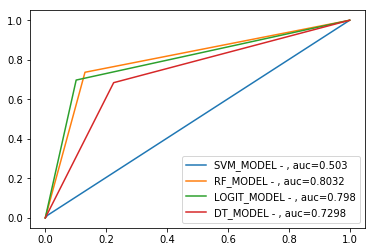

In [58]:
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test, svm_predict)
svm_auc = round(metrics.roc_auc_score(y_test, svm_predict),4)

rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, rf_predict)
rf_auc = round(metrics.roc_auc_score(y_test, rf_predict),4)

logit_fpr, logit_tpr, _ = metrics.roc_curve(y_test, logit_predict)
logit_auc = round(metrics.roc_auc_score(y_test, logit_predict),4)

DT_fpr, DT_tpr, _ = metrics.roc_curve(y_test, DT_predict)
DT_auc = round(metrics.roc_auc_score(y_test, DT_predict),4)



plt.plot(svm_fpr,svm_tpr,label="SVM_MODEL - , auc="+str(svm_auc))
plt.plot(rf_fpr,rf_tpr,label="RF_MODEL - , auc="+str(rf_auc))
plt.plot(logit_fpr,logit_tpr,label="LOGIT_MODEL - , auc="+str(logit_auc))
plt.plot(DT_fpr,DT_tpr,label="DT_MODEL - , auc="+str(DT_auc))

plt.legend(loc=4)
plt.show()


<ins> _**<span style= 'color:green'>Step7: - </span>**_ </ins>

In [52]:
# Loading test Dataset
test_data = pd.read_csv("C:\\NB\\TSI\\mdls_cls_R&Python\\projects\\titanic\\test.csv")

In [53]:
# Drop the unwanted variables and missing data 
test_data=test_data.drop(columns=['Cabin','Ticket','Name'])
test_data=test_data.dropna()

In [54]:
# Varibales encoding for train Dataset
lbl_encoder = LabelEncoder()

test_data['Sex'] = lbl_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = lbl_encoder.fit_transform(test_data['Embarked'])
# test_data['Cabin'] = lbl_encoder.fit_transform(test_data['Cabin'])

In [55]:
model_name = model_name.values[0]

In [56]:
if model_name == 'RF':
    test_data['predicted'] = np.round(rf_model.predict(test_data),0)
    test_data['model_name'] = model_name
elif model_name == 'LOGIT':
    test_data['predicted'] = np.round(logit_model.predict(test_data),0)
    test_data['model_name'] = model_name
elif model_name == 'SVM':
    test_data['predicted'] = np.round(svm_model.predict(test_data),0)
    test_data['model_name'] = model_name
elif model_name == 'DT':
    test_data['predicted'] = np.round(DT_model.predict(test_data),0)
    test_data['model_name'] = model_name

In [57]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predicted,model_name
0,892,3,1,34.5,0,0,7.8292,1,0,LOGIT
1,893,3,0,47.0,1,0,7.0000,2,1,LOGIT
2,894,2,1,62.0,0,0,9.6875,1,0,LOGIT
3,895,3,1,27.0,0,0,8.6625,2,0,LOGIT
4,896,3,0,22.0,1,1,12.2875,2,1,LOGIT
5,897,3,1,14.0,0,0,9.2250,2,0,LOGIT
6,898,3,0,30.0,0,0,7.6292,1,1,LOGIT
7,899,2,1,26.0,1,1,29.0000,2,0,LOGIT
8,900,3,0,18.0,0,0,7.2292,0,1,LOGIT
9,901,3,1,21.0,2,0,24.1500,2,0,LOGIT
